In [1]:
%run style_and_packages.ipynb

# Beispiel: Gesamtantwort ohne Dämpfung

## Aufgabenstellung

Das System in @fig-ems_ges_system_maschine zeigt ein Stabwerk, welches durch eine Werkzeugmaschine angeregt wird.

![Statisches System des Stabwerks](bilder/aufgabe_ems_ges_system.svg){#fig-ems_ges_system_maschine}


Gesucht:

- Eigenkreisfrequenz $\omega_n$
- Dynamischer Vergrösserungsfaktor $V(\omega)$
- Stationäre Antwort $u_p(t)$ mit dem dynamischen Vergrösserungsfaktor $V(\omega)$
- Gesamtantwort $u(t)$ mit den Anfangsbedingungen $u(t=0) = 0 \text{ und } u'(t=0)=0$
- Festigkeitsnachweis der Diagonalen
  
Gegeben:

- Gesamtmasse inkl. rotierende Massen $m_{tot} = 5t$
- Rotierende Massen in Werkzeugmaschine $m_1 = 0.2 t$
- Drehzahl Werkzeugmaschine $n = 150/\text{min}$
- Exzentrizität der rotierenden Massen $e =0.1\text{m}$
- Dämpfungsrate $\zeta = 0.0$
- Alle Stäbe ausser Diagonalen $E\cdot A = \infty$
- Alle Stäbe S355 

![Aufbau der Werkzeugmaschine](bilder/aufgabe_ems_werkzeugmaschine.svg){#fig-ems_ges_maschine}


{{< pagebreak >}}

## Musterlösung




In [2]:
#| label: tbl-parameter_gesamt
#| tbl-cap: Verwendete Parameter

params = {              
          'm_tot':5000*unit.N*unit.second**2/unit.m, 
          'E':210*10**3*unit.N/unit.mm**2,
          'H':4000*unit.mm,
          'B':6000*unit.mm,
          '\oslash_Diag':12*unit.mm,
          'f_yd':338*unit.N/unit.mm**2,
          'm_1':200*unit.N*unit.second**2/unit.m,
          'n':150/unit.minute,
          'e':0.1*unit.m,
          'zeta':0.0,
          }

params_plot = convert.param_value(params=params)

render.dict_to_table(params)

| Parameter |  |
|---|---|
| $B = 6000 \text{mm}$ | $E = \frac{210000 \text{N}}{\text{mm}^{2}}$ |
| $H = 4000 \text{mm}$ | $\oslash_{Diag} = 12 \text{mm}$ |
| $e = 0.1 \text{m}$ | $f_{yd} = \frac{338 \text{N}}{\text{mm}^{2}}$ |
| $m_{1} = \frac{200 \text{N} \text{s}^{2}}{\text{m}}$ | $m_{tot} = \frac{5000 \text{N} \text{s}^{2}}{\text{m}}$ |
| $n = \frac{150}{\text{minute}}$ | $\zeta = 0.0$ |


In [3]:
m_tot, E, H, B, Diam, f_yd, m_1, n, e = sp.symbols('m_tot, E, H, B, \oslash_Diag, f_yd, m_1, n, e')

F_0, omega, t, zeta = sp.symbols('F_0, omega, t, zeta')

In [4]:
F_t = F_0 * sp.cos(omega*t)

### Systemsteifigkeit

Zur Ermittlung der Eigenkreisfrequenz wird die Steifigkeit des gesamten Systems benötigt.

![Verformungszustand des Systems für die Einheitskraft](bilder/aufgabe_ems_ge_verformung.svg){#fig-ems_ges_verform_FW}

Das System wird mit einer Einheitskraft belastet. Aufgrund der Eigenschaften der Pendelstäbe (lediglich Normalkräfte) und deren unendlich grossen Dehnsteifigkeit, spielt lediglich die Verformung der Diagonalen eine Rolle. Dazu gilt, dass die Diagonalen nur Zugkräfte aufnehmen können. Das bedeutet, dass letztlich ein Stab aktiv ist für die beschrieben Situation in @fig-ems_ges_verform_FW.

Dazu muss die Normalkraft in der Diagonalen bestimmt werden.

In [5]:
alpha = sp.atan(H/B)

Z_Diag = 1000*unit.N /sp.cos(alpha)


render.eq_display('alpha', alpha,
                  'alpha', alpha.subs(params).evalf(3),
                  'Z_Diag', Z_Diag,
                  'Z_Diag',Z_Diag.subs(params).evalf(3))

        ⎛H⎞
α = atan⎜─⎟
        ⎝B⎠

α = 0.588

                    ________       
                   ╱      2        
                  ╱      H         
Z_Diag = 1000⋅   ╱   1 + ── ⋅newton
                ╱         2        
              ╲╱         B         

Z_Diag = 1.2e+3⋅newton

Mittels der Arbeitsgleichung lässt sich die Verformung bestimmen. Für die Integration zweier Normalkraftverläufe gilt die folgende Beziehung:

$$
u = \frac{1}{EA_{Diag}}  \int_{0}^{l_{Diag}} N_x\bar{N_x} \,dx
$${#eq-ems_ges_deformation}

Länge der Diagonalen:


In [6]:
l_Diag = B /sp.cos(alpha)
A_Diag = sp.pi * Diam**2 / 4
u_for_k = 1/(E*A_Diag) * Z_Diag * Z_Diag/(1000*unit.N) * l_Diag

k = 1000*unit.N / u_for_k
render.eq_display('l_Diag', l_Diag,
                  'l_Diag', unit.convert_to(l_Diag.subs(params).evalf(3), unit.m),)

                 ________
                ╱      2 
               ╱      H  
l_Diag = B⋅   ╱   1 + ── 
             ╱         2 
           ╲╱         B  

l_Diag = 7.21⋅meter

Querschnittsfläche der Diagonalen:

In [7]:
render.eq_display('A_Diag', A_Diag,
                  'A_Diag', A_Diag.subs(params).evalf(3))

                       2
         π⋅\oslash_Diag 
A_Diag = ───────────────
                4       

                         2
A_Diag = 113.0⋅millimeter 

Deformation der Diagonalen

In [8]:
render.eq_display(
                  'u_k', u_for_k,
                  'u_k', u_for_k.subs(params).evalf(3))

                    3/2       
            ⎛     2⎞          
            ⎜    H ⎟          
     4000⋅B⋅⎜1 + ──⎟   ⋅newton
            ⎜     2⎟          
            ⎝    B ⎠          
uₖ = ─────────────────────────
                         2    
         π⋅E⋅\oslash_Diag     

uₖ = 0.439⋅millimeter

Steifigkeit des Systems:

In [9]:
render.eq_display('k', 'F/u_k',
                  'k', k.subs(params).evalf(3))

    F 
k = ──
    uₖ

    2.28e+3⋅newton
k = ──────────────
      millimeter  

### Eigenkreisfrequenz

Aus der Systemsteifigkeit lässt sich leicht die Eigenkreisfrequenz bestimmen:

$$
\omega_n =\sqrt{\frac{k}{m}}
$${#eq-ems_ges_eigenkreisfrequenz}

In [10]:
omega_n = sp.sqrt(k/m_tot)

render.eq_display('omega_n', omega_n,
                  'omega_n', omega_n.subs(params).simplify().evalf(3))

                  ____________________
                 ╱                2   
                ╱   E⋅\oslash_Diag    
     √π⋅       ╱   ────────────────── 
              ╱                   3/2 
             ╱            ⎛     2⎞    
            ╱             ⎜    H ⎟    
           ╱       B⋅mₜₒₜ⋅⎜1 + ──⎟    
          ╱               ⎜     2⎟    
        ╲╱                ⎝    B ⎠    
ωₙ = ─────────────────────────────────
                     2                

      21.4 
ωₙ = ──────
     second

### Dynamischer Vergrösserungsfaktor

#### Anregungsfunktion

Zur Bestimmung des dynamischen Vergrösserungsfaktor wird die stationäre Verformung benötigt.  Diese lässt sich aus der Anfangskraft der Anregungsfunktion ermitteln. Dazu wird diese Funktion benötigt. Wir wissen die Drehzahl $n$ und die Exzentrizität $e$ sowie deren Masse $m_1$.

In [11]:
f = unit.convert_to(n.subs(params),unit.second)
omega = 2*sp.pi*f
params['omega'] = omega.subs(params).simplify()

render.eq_display('f', 'n',
                  'f', f.evalf(3),
                  'omega', '2*pi*f',
                  'omega', omega.evalf(3),
                  )

f = n

     2.5  
f = ──────
    second

ω = 2⋅π⋅f

     15.7 
ω = ──────
    second

Nun fehlt lediglich die Anfangskraft $F_0$. Die Fliehkraft $F$ der 2 gegenläufig rotierenden Massen bewirken eine addierende Fliehkraft in horizontaler Richtung zu:

$$
F_0 = 2(m_1 \cdot e \cdot \omega^2)
$${#eq-ems_ges_anfangskraft}


In [12]:
F_0 = 2*(m_1*e*omega**2)
params['F_0'] = F_0.subs(params).simplify()
render.eq_display('F_0', F_0,
                  'F_0', F_0.subs(params).simplify().evalf(3))

         2     
     50⋅π ⋅e⋅m₁
F₀ = ──────────
            2  
      second   

F₀ = 9.87e+3⋅newton

#### Statische Deformation

Die statische Deformation lässt sich nun leicht anhand der ermittelten Systemsteifigkeit herleiten.

In [13]:
u_0 = F_0/k

render.eq_display(
    'u_0', 'F_0/k',
    'u_0', u_0.subs(params).simplify().evalf(3))

     F₀
u₀ = ──
     k 

u₀ = 4.33⋅millimeter

#### Vergrösserungsfaktor

In [14]:
V_omega = 1/(sp.sqrt((1-(omega/omega_n)**2)**2 + (2*zeta*(omega/omega_n))**2))

render.eq_display('V(omega)', '1/(sqrt((1-(omega/omega_n)**2)**2 + (2*zeta_*(omega/omega_n))**2))',
                  'V(omega)', V_omega.subs(params).simplify().evalf(3))

                      1               
V(ω) = ───────────────────────────────
              ________________________
             ╱                      2 
            ╱     2  2   ⎛    2    ⎞  
           ╱   4⋅ω ⋅ζ    ⎜   ω     ⎟  
          ╱    ─────── + ⎜- ─── + 1⎟  
         ╱         2     ⎜    2    ⎟  
       ╲╱        ωₙ      ⎝  ωₙ     ⎠  

V(ω) = 2.18

### Stationäre Antwort

Es handelt sich um einen ungedämpften Einmassenschwinger mit einer harmonischen Anregungsfunktion. Die Bewegungsgleichung ist die folgende:

$$
mu''(t)+ ku(t) = F(t)
$${#eq-ems_ges_bewegungsgleichung_inhom}

Dies ist eine inhomogene Differentialgleichung 2. Ordnung. Die Lösung dieser lässt sich in einen partikulären Anteil und in einen homogenen Anteil aufteilen. Der partikuläre Anteil entspricht der stationären Antwort. Der homogene Anteil nennt sich transienter Anteil. Wäre eine Dämpfung im System vorhanden, so startet der Schwungvorgang aus einer Kombination beider Teile. Aufgrund der Dämpfung verschwindet der stationäre Anteil und das System wird schlussendlich nur noch durch den transienten Anteil deformiert. 

Anhand des Vergrösserungsfaktor kann die stationäre dynamische Antwort des Systems mit der folgenden Beziehung ermittelt werden.

$$
u_p = V(\omega)u_0 \cdot \cos{(\omega t)}
$${#eq-ems_ges_part_loesung}



In [15]:
u_p = V_omega * u_0 *sp.cos(omega *t)

render.eq_display('u_p', u_p.subs(params).simplify().evalf(3))

             ⎛5⋅π⋅t ⎞           
uₚ = 9.43⋅cos⎜──────⎟⋅millimeter
             ⎝second⎠           

### Gesamtantwort

Für die Gesamtantwort wird nun noch der homogene Anteil benötigt. Dazu ist die folgende Differentialgleichung zu lösen.

$$
mu''(t)+ ku(t) = 0
$${#eq-ems_ges_bewegungsgleichung_homog}

Als Ansatzfunktion dient die folgende Gleichung:

$$
u_h = A_1\cos{(\omega_n t)} + A_2 \sin{(\omega_n t)}
$${#eq-ems_ges_ansatz_homogen}


Die Randbedingungen sind in der Aufgabenstellung definiert und sind die folgenden:

$u(t=0)=0$

$u'(t=0)=0$

Vorsicht, die Randbedingungen gelten für die gesamte Lösung:

$$
u(t) = u_h(t) + u_p(t)
$${#eq-ems_ges_gesamtloesung}

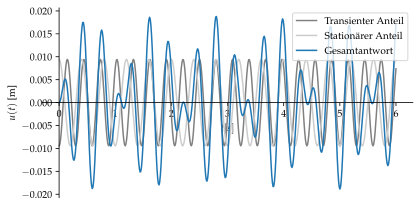

In [16]:
#| label: fig-ems_ges_gesamtantwort_ems4
#| fig-cap: "Antworten des Systems ohne Dämpfung"


A_1, A_2 = sp.symbols('A_1:3')

u_h_ansatz = A_1 * sp.cos(omega_n*t)+A_2*sp.sin(omega_n*t)
randbedingung_1 = (u_h_ansatz+u_p).subs(t,0)
randbedingung_2 = sp.diff((u_h_ansatz+u_p),t).subs(t,0)

A_solve = sp.solve([randbedingung_1, randbedingung_2], [A_1, A_2], dict=True)[0]


u_h = u_h_ansatz.subs(A_solve)


u_t = u_h+u_p

u_t_plot = u_t.subs(params_plot).subs(unit.second, 1)
u_p_plot = u_p.subs(params_plot).subs(unit.second, 1)
u_h_plot = u_h.subs(params_plot).subs(unit.second, 1)

p_1 = sp.plot(u_h_plot, (t,0,6), adaptive=False, nb_of_points=500, 
        xlabel='$t [s]$',
        ylabel='$u(t)$ [m]',
        size=(5.9,3),show=False,label='Transienter Anteil', legend=True, line_color='0.5')

p_2 = sp.plot(u_p_plot, (t,0,6), adaptive=False, nb_of_points=500,show=False,label='Stationärer Anteil', line_color='0.8')

p_3 = sp.plot(u_t_plot, (t,0,6), adaptive=False, nb_of_points=500,show=False,label='Gesamtantwort')


p_1.append(p_2[0])
p_1.append(p_3[0])

p_1.show()

### Festigkeitsnachweis

Aufgrund der maximalen Auslenkung, kann die maximale Normalkraft auf der Diagonalen bestimmt werden.

#### Maximale Auslenkung

Aus dem Plot in @fig-ems_ges_gesamtantwort_ems4 ist die maximale Auslenkung ersichtlich. Die Ermittlung des Zeitpunkts bei einer maximalen Auslenkung wird hier numerisch gelöst.

In [17]:
t_max_auslenkung = sp.nsolve(sp.diff(u_t_plot,t), t,(2.6,2.8))

u_max = u_t_plot.subs(t,t_max_auslenkung)


render.eq_display('t_max', (t_max_auslenkung*unit.second).evalf(3),
                  'u_max', (u_max*unit.m).evalf(3))

tₘₐₓ = 2.8⋅second

uₘₐₓ = 0.0188⋅meter

#### Maximale Einwirkung

Aufgrund der maximalen Amplitude verlängert sich die Diagonale um $\Delta l = u_{max}$. Die Dehnung des Stabs ist somit die $\frac{\Delta l}{l_{Diag}}$. Bei linear elastischem Materialverhalten gilt die folgende Beziehung:

$$
\sigma = \varepsilon E
$${#eq-ems_ges_spannung}

In [18]:
epsilon = u_max*unit.m / sp.cos(alpha) / l_Diag
sigma = epsilon*E

Nachweis = sigma / f_yd

render.eq_display('varepsilon', epsilon.subs(params).simplify().evalf(3),
                  'sigma', unit.convert_to(sigma.subs(params).simplify().evalf(3), unit.mm**2),
                  'f_yd', f_yd.subs(params),
                  'Nachweis', 'sigma / f_yd',
                  'Nachweis', Nachweis.subs(params).simplify().evalf(3))

varepsilon = 0.00314

    659.0⋅newton
σ = ────────────
              2 
    millimeter  

        338⋅newton
f_yd = ───────────
                 2
       millimeter 

            σ  
Nachweis = ────
           f_yd

Nachweis = 1.95

Die Diagonale würde plastifizieren, so dass die linearen Annahmen für die Berechnung der Systemantwort nicht angewendet werden dürfen.